In [1]:
import os
import pandas as pd
import numpy as np

import functools 


from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import matplotlib.cm as cm


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
def mash_pairwise_to_matrix(distance_file):
    df = pd.read_csv(distance_file, sep='\t', names=['reference_ID', 'query_ID', 'distance', 'p_value', 'shared_hashes'])
    df[['hash_1', 'hash_2']] = df['shared_hashes'].str.split('/', expand=True)
    df.hash_1 = df.hash_1.astype(float)
    df.hash_2 = df.hash_2.astype(float)
    df['hash_distance'] = 1 - (df.hash_1 / df.hash_2)
    dfpair = df[['reference_ID', 'query_ID', 'hash_distance']]
    dist_matrix = dfpair.groupby(['reference_ID', 'query_ID']).mean().unstack()
    dist_matrix = dist_matrix.droplevel(0, axis=1)
    
    return dist_matrix

In [3]:
distance_file = 'K10339.mash.distance.tab'

In [4]:
dist_matrix = mash_pairwise_to_matrix(distance_file)

In [5]:
dist_matrix

query_ID,CP029217.1,LR134132.1,NZ_CM004622.1,NZ_CM017034.1,NZ_CM017091.1,NZ_CM017179.1,NZ_CP011334.1,NZ_CP015133.1,NZ_CP015501.1,NZ_CP018443.1,NZ_CP020850.1,NZ_CP023947.1,NZ_CP024516.1,NZ_CP026852.1,NZ_CP027151.1,NZ_CP027154.1,NZ_CP027156.1,NZ_CP027163.1,NZ_CP028818.1,NZ_CP029222.1,NZ_CP031580.1,NZ_CP034282.1,NZ_CP035347.1,NZ_CP035364.1,NZ_CP036325.1,NZ_CP041935.1,NZ_CP042869.1,NZ_CP044032.1,NZ_CP045282.1,NZ_LR025100.1,NZ_LT904874.1,WMHT01000002.1
reference_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CP029217.1,0.000,0.996,1.000,1.000,1.000,1.000,1.000,1.000,0.999,1.000,1.000,0.999,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,0.999,1.000,1.000,1.0,0.999,1.000,1.000,1.000,1.000,1.0,0.999
LR134132.1,0.996,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000,1.0,1.000
NZ_CM004622.1,1.000,1.000,0.000,1.000,0.563,0.476,0.674,1.000,1.000,0.998,0.989,0.973,0.981,0.996,1.000,1.000,0.995,1.000,0.998,1.0,1.000,0.978,1.000,0.999,1.0,1.000,1.000,0.998,0.997,0.998,1.0,1.000
NZ_CM017034.1,1.000,1.000,1.000,0.000,1.000,1.000,0.913,1.000,1.000,1.000,1.000,0.987,0.989,1.000,1.000,1.000,0.997,1.000,1.000,1.0,1.000,0.989,1.000,1.000,1.0,0.994,1.000,1.000,0.999,1.000,1.0,1.000
NZ_CM017091.1,1.000,1.000,0.563,1.000,0.000,0.207,0.882,1.000,1.000,1.000,1.000,0.973,0.981,1.000,1.000,1.000,0.989,1.000,1.000,1.0,1.000,0.978,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000,1.0,1.000
NZ_CM017179.1,1.000,1.000,0.476,1.000,0.207,0.000,0.860,1.000,1.000,1.000,1.000,0.978,0.984,1.000,1.000,1.000,0.992,1.000,1.000,1.0,1.000,0.981,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000,1.0,1.000
NZ_CP011334.1,1.000,1.000,0.674,0.913,0.882,0.860,0.000,1.000,1.000,1.000,1.000,0.983,0.987,1.000,1.000,1.000,0.999,1.000,1.000,1.0,1.000,0.987,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000,1.0,1.000
NZ_CP015133.1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.995,0.995,0.986,1.000,1.000,0.995,1.000,1.000,1.0,1.000,0.995,1.000,1.000,1.0,0.996,1.000,1.000,0.980,1.000,1.0,0.995
NZ_CP015501.1,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.996,0.956,0.991,0.957,0.989,1.000,1.000,0.514,1.000,0.996,1.0,0.751,0.993,1.000,1.000,1.0,0.488,0.854,0.996,0.996,0.996,1.0,0.955


In [6]:
Z = hierarchy.linkage(dist_matrix, method='average')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


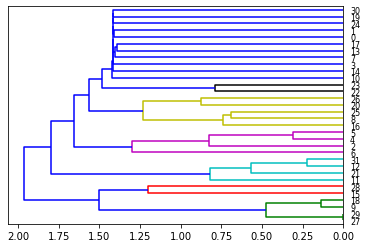

In [7]:
dendro = hierarchy.dendrogram(Z, orientation='left')

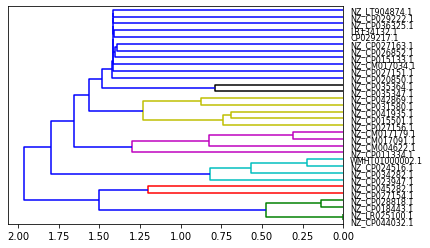

In [8]:
dendro = hierarchy.dendrogram(Z, labels=dist_matrix.columns, orientation='left')

In [9]:
tree = hierarchy.to_tree(Z, False)

In [10]:
leafIndex = tree.pre_order()

In [11]:
leafNames = dist_matrix.columns.tolist()

In [12]:
max_d = 1
leafCluster = hierarchy.fcluster(Z, max_d, criterion='distance')

In [13]:
leafNames

['CP029217.1',
 'LR134132.1',
 'NZ_CM004622.1',
 'NZ_CM017034.1',
 'NZ_CM017091.1',
 'NZ_CM017179.1',
 'NZ_CP011334.1',
 'NZ_CP015133.1',
 'NZ_CP015501.1',
 'NZ_CP018443.1',
 'NZ_CP020850.1',
 'NZ_CP023947.1',
 'NZ_CP024516.1',
 'NZ_CP026852.1',
 'NZ_CP027151.1',
 'NZ_CP027154.1',
 'NZ_CP027156.1',
 'NZ_CP027163.1',
 'NZ_CP028818.1',
 'NZ_CP029222.1',
 'NZ_CP031580.1',
 'NZ_CP034282.1',
 'NZ_CP035347.1',
 'NZ_CP035364.1',
 'NZ_CP036325.1',
 'NZ_CP041935.1',
 'NZ_CP042869.1',
 'NZ_CP044032.1',
 'NZ_CP045282.1',
 'NZ_LR025100.1',
 'NZ_LT904874.1',
 'WMHT01000002.1']

In [14]:
leafCluster

array([13, 14,  5, 18,  5,  5,  6, 12,  7,  1, 20,  4,  4, 10, 19,  2,  7,
       11,  1, 15,  8,  4,  9,  9, 17,  7,  8,  1,  3,  1, 16,  4],
      dtype=int32)

In [15]:
nodes = []
for leaf, group in zip(leafNames, leafCluster):
    nodes.append(dict(id = leaf, group = group))

In [17]:
nodes

[{'id': 'CP029217.1', 'group': 13},
 {'id': 'LR134132.1', 'group': 14},
 {'id': 'NZ_CM004622.1', 'group': 5},
 {'id': 'NZ_CM017034.1', 'group': 18},
 {'id': 'NZ_CM017091.1', 'group': 5},
 {'id': 'NZ_CM017179.1', 'group': 5},
 {'id': 'NZ_CP011334.1', 'group': 6},
 {'id': 'NZ_CP015133.1', 'group': 12},
 {'id': 'NZ_CP015501.1', 'group': 7},
 {'id': 'NZ_CP018443.1', 'group': 1},
 {'id': 'NZ_CP020850.1', 'group': 20},
 {'id': 'NZ_CP023947.1', 'group': 4},
 {'id': 'NZ_CP024516.1', 'group': 4},
 {'id': 'NZ_CP026852.1', 'group': 10},
 {'id': 'NZ_CP027151.1', 'group': 19},
 {'id': 'NZ_CP027154.1', 'group': 2},
 {'id': 'NZ_CP027156.1', 'group': 7},
 {'id': 'NZ_CP027163.1', 'group': 11},
 {'id': 'NZ_CP028818.1', 'group': 1},
 {'id': 'NZ_CP029222.1', 'group': 15},
 {'id': 'NZ_CP031580.1', 'group': 8},
 {'id': 'NZ_CP034282.1', 'group': 4},
 {'id': 'NZ_CP035347.1', 'group': 9},
 {'id': 'NZ_CP035364.1', 'group': 9},
 {'id': 'NZ_CP036325.1', 'group': 17},
 {'id': 'NZ_CP041935.1', 'group': 7},
 {'id': 

https://stackoverflow.com/questions/19964266/scipy-dendrogram-to-json-for-d3-js-tree-visualisation

### Construct a nested dictionary representing the dendrogram

In [61]:
# Create a nested dictionary from the ClusterNode's returned by SciPy
def add_node(node, parent):
    # First create the new node and append it to its parent's children
    newNode = dict( node_id=node.id, children=[] )
    parent["children"].append( newNode )

    # Recursively add the current node's children
    if node.left: add_node( node.left, newNode )
    if node.right: add_node( node.right, newNode )

#T = scipy.cluster.hierarchy.to_tree( clusters , rd=False )
#d3Dendro = dict(children=[], name="Root1")
#add_node( T, d3Dendro )
# Output: => {'name': 'Root1', 'children': [{'node_id': 10, 'children': [{'node_id': 1, 'children': []}, {'node_id': 9, 'children': [{'node_id': 6, 'children': [{'node_id': 0, 'children': []}, {'node_id': 2, 'children': []}]}, {'node_id': 8, 'children': [{'node_id': 5, 'children': []}, {'node_id': 7, 'children': [{'node_id': 3, 'children': []}, {'node_id': 4, 'children': []}]}]}]}]}]}

In [26]:
# Create a nested dictionary from the ClusterNode's returned by SciPy
data = {}
data["links"] = []
def iternode(node, leafNames, leafIndex):
    # First create the new node and append it to its parent's children
    def checkname(nodeid):
        if nodeid in leafIndex:
            return leafNames[nodeid]
        else:
            return "NODE_" + str(nodeid)
    
    if node.left: 
        data["links"].append(dict(source = checkname(node.id), target = checkname(node.left.id), distance= round(node.dist, 2)))
        iternode( node.left, leafNames, leafIndex )
    if node.right:
        data["links"].append(dict(source = checkname(node.id), target = checkname(node.right.id), distance= round(node.dist, 2)))
        iternode( node.right, leafNames, leafIndex )

#T = scipy.cluster.hierarchy.to_tree( clusters , rd=False )
#d3Dendro = dict(children=[], name="Root1")
#add_node( T, d3Dendro )
# Output: => {'name': 'Root1', 'children': [{'node_id': 10, 'children': [{'node_id': 1, 'children': []}, {'node_id': 9, 'children': [{'node_id': 6, 'children': [{'node_id': 0, 'children': []}, {'node_id': 2, 'children': []}]}, {'node_id': 8, 'children': [{'node_id': 5, 'children': []}, {'node_id': 7, 'children': [{'node_id': 3, 'children': []}, {'node_id': 4, 'children': []}]}]}]}]}]}

In [27]:
iternode(tree, leafNames, leafIndex)

In [28]:
data['links']

[{'source': 'NODE_62', 'target': 'NODE_58', 'distance': 1.96},
 {'source': 'NODE_58', 'target': 'NODE_36', 'distance': 1.51},
 {'source': 'NODE_36', 'target': 'NODE_32', 'distance': 0.47},
 {'source': 'NODE_32', 'target': 'NZ_CP044032.1', 'distance': 0.0},
 {'source': 'NODE_32', 'target': 'NZ_LR025100.1', 'distance': 0.0},
 {'source': 'NODE_36', 'target': 'NODE_33', 'distance': 0.47},
 {'source': 'NODE_33', 'target': 'NZ_CP018443.1', 'distance': 0.14},
 {'source': 'NODE_33', 'target': 'NZ_CP028818.1', 'distance': 0.14},
 {'source': 'NODE_58', 'target': 'NODE_44', 'distance': 1.51},
 {'source': 'NODE_44', 'target': 'NZ_CP027154.1', 'distance': 1.2},
 {'source': 'NODE_44', 'target': 'NZ_CP045282.1', 'distance': 1.2},
 {'source': 'NODE_62', 'target': 'NODE_61', 'distance': 1.96},
 {'source': 'NODE_61', 'target': 'NODE_41', 'distance': 1.8},
 {'source': 'NODE_41', 'target': 'NZ_CP023947.1', 'distance': 0.82},
 {'source': 'NODE_41', 'target': 'NODE_37', 'distance': 0.82},
 {'source': 'NODE_

In [21]:
nodelist = []
for i in data['links']:
    if not i['source'] in nodelist:
        nodelist.append(i['source'])
        nodes.append(dict(id = i['source'], group = 0))
    

In [22]:
nodes

[{'id': 'CP029217.1', 'group': 13},
 {'id': 'LR134132.1', 'group': 14},
 {'id': 'NZ_CM004622.1', 'group': 5},
 {'id': 'NZ_CM017034.1', 'group': 18},
 {'id': 'NZ_CM017091.1', 'group': 5},
 {'id': 'NZ_CM017179.1', 'group': 5},
 {'id': 'NZ_CP011334.1', 'group': 6},
 {'id': 'NZ_CP015133.1', 'group': 12},
 {'id': 'NZ_CP015501.1', 'group': 7},
 {'id': 'NZ_CP018443.1', 'group': 1},
 {'id': 'NZ_CP020850.1', 'group': 20},
 {'id': 'NZ_CP023947.1', 'group': 4},
 {'id': 'NZ_CP024516.1', 'group': 4},
 {'id': 'NZ_CP026852.1', 'group': 10},
 {'id': 'NZ_CP027151.1', 'group': 19},
 {'id': 'NZ_CP027154.1', 'group': 2},
 {'id': 'NZ_CP027156.1', 'group': 7},
 {'id': 'NZ_CP027163.1', 'group': 11},
 {'id': 'NZ_CP028818.1', 'group': 1},
 {'id': 'NZ_CP029222.1', 'group': 15},
 {'id': 'NZ_CP031580.1', 'group': 8},
 {'id': 'NZ_CP034282.1', 'group': 4},
 {'id': 'NZ_CP035347.1', 'group': 9},
 {'id': 'NZ_CP035364.1', 'group': 9},
 {'id': 'NZ_CP036325.1', 'group': 17},
 {'id': 'NZ_CP041935.1', 'group': 7},
 {'id': 

In [62]:
d3Dendro = dict(children=[], name="Root1")

In [64]:
add_node( tree, d3Dendro)

In [67]:
d3Dendro['children'][0]

{'node_id': 20,
 'children': [{'node_id': 14,
   'children': [{'node_id': 11,
     'children': [{'node_id': 3, 'children': []},
      {'node_id': 9, 'children': []}]},
    {'node_id': 13,
     'children': [{'node_id': 10, 'children': []},
      {'node_id': 12,
       'children': [{'node_id': 6, 'children': []},
        {'node_id': 7, 'children': []}]}]}]},
  {'node_id': 19,
   'children': [{'node_id': 17,
     'children': [{'node_id': 1, 'children': []},
      {'node_id': 16,
       'children': [{'node_id': 2, 'children': []},
        {'node_id': 15,
         'children': [{'node_id': 4, 'children': []},
          {'node_id': 5, 'children': []}]}]}]},
    {'node_id': 18,
     'children': [{'node_id': 0, 'children': []},
      {'node_id': 8, 'children': []}]}]}]}

### Label the dendrogram

In [75]:
# Label each node with the names of each leaf in its subtree
def label_tree( n ):
    # If the node is a leaf, then we have its name
    if len(n["children"]) == 0:
        leafNames = [ id2name[n["node_id"]] ]

    # If not, flatten all the leaves in the node's subtree
    else:
        leafNames = functools.reduce(lambda ls, c: ls + label_tree(c), n["children"], [])

    # Delete the node id since we don't need it anymore and
    # it makes for cleaner JSON
    del n["node_id"]

    # Labeling convention: "-"-separated leaf names
    n["name"] = name = "-".join(sorted(map(str, leafNames)))

    return leafNames

#label_tree( d3Dendro["children"][0] )

In [ ]:
def linkage_to_newick(dataframe, output_file):
    """
    Thanks to https://github.com/biocore/scikit-bio/issues/1579
    Input :  Z = linkage matrix, labels = leaf labels
    Output:  Newick formatted tree string
    """
    dataframe_only_samples = dataframe.set_index(dataframe['Position'].astype(int)).drop(['Position','N','Samples'], axis=1) #extract three first colums and use 'Position' as index
    labelList = dataframe_only_samples.columns.tolist()
    Z = shc.linkage(dataframe_only_samples.T, method='average')

    tree = shc.to_tree(Z, False)
    def buildNewick(node, newick, parentdist, leaf_names):
        if node.is_leaf():
            #logger.info("%s:%f%s" % (leaf_names[node.id], parentdist - node.dist, newick))
            return "%s:%f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
        else:
            if len(newick) > 0:
                newick = f"):{(parentdist - node.dist)/2}{newick}"
            else:
                newick = ");"
            newick = buildNewick(node.get_left(), newick, node.dist, leaf_names)
            newick = buildNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
            newick = "(%s" % (newick)
            #logger.info(newick)
            return newick

    with open(output_file, 'w') as f:
        f.write(buildNewick(tree, "", tree.dist, labelList))
    return buildNewick(tree, "", tree.dist, labelList)